In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd



In [2]:
path = r'..\COVID-19\csse_covid_19_data\csse_covid_19_time_series'

Confirmed = pd.read_csv(path + "/time_series_19-covid-Confirmed.csv", index_col=None, header=0)

In [3]:
#switch 2 diffrent name of the same country
confirmed_in_country = Confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
confirmed_in_country.replace('Bahamas', 'The Bahamas', inplace = True)
confirmed_in_country.replace('Congo (Brazzaville)', 'Congo (Kinshasa)', inplace = True)
confirmed_in_country.replace('Gambia', 'The Gambia', inplace = True)

#sum of cases in one country in dataframe, perhaps there is a easiest way to do it
world_confirmed = pd.DataFrame(columns=confirmed_in_country.columns.values)
for country in set(confirmed_in_country['Country/Region'].tolist()):
    world_confirmed= world_confirmed.append(pd.Series([country],index=['Country/Region']).append(confirmed_in_country[confirmed_in_country.loc[:, 'Country/Region'] == country].drop(['Country/Region'],axis=1).sum()),ignore_index=True)


In [4]:
#load world map

world =  r'./world_map'
world_data = gpd.read_file(world+'/World_Map.shp')

In [5]:
#swich country names and cols name in world_data
#I will try to change it in shp file

world_data.replace('Timor-Leste', 'East Timor', inplace = True)
world_data.replace('Equatorial Guinea', 'Equatorial Guinea', inplace = True)  
world_data.replace('Cape Verde', 'Cabo Verde', inplace = True)
world_data.replace('Republic of Moldova', 'Moldova', inplace = True)        
world_data.replace('United States', 'US', inplace = True)
world_data.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world_data.replace('Gambia', 'The Gambia', inplace = True)
world_data.replace('Bahamas', 'The Bahamas', inplace = True)
world_data.replace('Czech Republic', 'Czechia', inplace = True)
world_data.replace('Viet Nam', 'Vietnam', inplace = True)
world_data.replace('Swaziland', 'Eswatini', inplace = True)
world_data.replace('Taiwan', 'Taiwan*', inplace = True)
world_data.replace('Brunei Darussalam', 'Brunei', inplace = True)
world_data.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world_data.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world_data.replace('Congo', 'Republic of the Congo', inplace = True)
world_data.replace('Syrian Arab Republic', 'Syria', inplace = True)
world_data.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world_data.replace('Korea, Republic of', 'Korea, South', inplace = True)


world_data.rename(columns = {'NAME': 'Country/Region'}, inplace = True)

Text(0.5, 1.0, 'Confirmed case of coronavirus (COVID-19)')

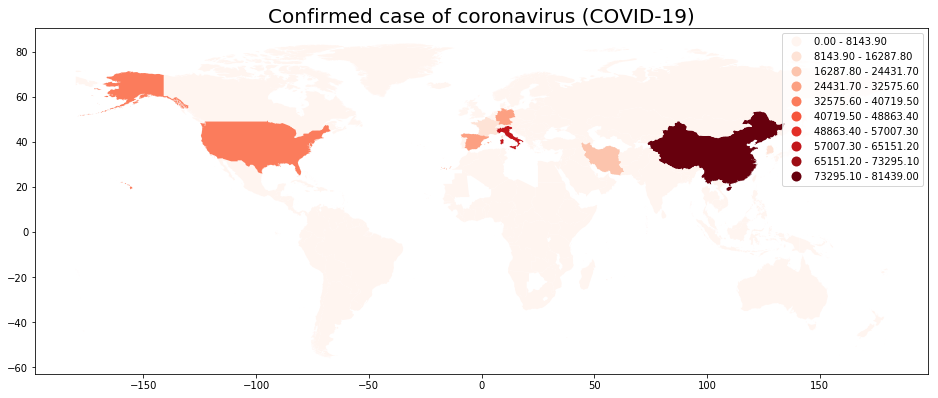

In [6]:
#merge of COVID data with world map
world_map_confirmed = world_data.merge(world_confirmed, on = 'Country/Region')


#plot confirmed cases on world
ax = world_map_confirmed.dropna().plot(column='3/23/20', cmap='Reds', figsize=(16,10), scheme='equal_interval', k=10, legend=True)
ax.set_title('Confirmed case of coronavirus (COVID-19)', fontdict={'fontsize': 20}, loc='center')